In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vz = pd.read_excel('Verizon customers.xlsx')

In [4]:
vz.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
vz.drop('customerID', axis = 1, inplace = True)

In [6]:
vz.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
dummies = vz[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

In [8]:
dummied = pd.get_dummies(dummies,drop_first = True)

In [9]:
dummied['tenure'] = vz.tenure
dummied['MonthlyCharges'] = vz.MonthlyCharges

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = dummied.drop('Churn_Yes', axis = 1)
y = dummied.Churn_Yes.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [15]:
y = dummied['Churn_Yes']
X = dummied.drop(columns=['Churn_Yes'], axis=1)

In [16]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [17]:
result.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7020
Method:                           MLE   Df Model:                           22
Date:                Thu, 24 Sep 2020   Pseudo R-squ.:                     inf
Time:                        12:51:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
SeniorCitizen                             0.2170      0.085      2.556      0.011       0.051       0.383
gender_Male                              -0.0205      0.065     -0.316      0.752      -0.148       0.107
Partner_Yes                              -0.0024      0.078     -0.031      0.975      -0.155       0.150
Dependents_Yes                           -0.1671      0.090     -1.863      0.062      -0.343       0.009
PhoneService_Yes                          0.7776      1.444      0.539      0.590      -2.052       3.607
MultipleLines_No phone service            0.6121      0.812      0.754      0.451      -0.979       2.204
MultipleLines_Yes                         0.4628      0.178      2.599      0.009       0.114       0.812
InternetService_Fiber optic               1.7201      0.804      2.140      0.032       0.145       3.295
InternetService_No                       -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
OnlineSecurity_No internet service       -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
OnlineSecurity_Yes                       -0.1995      0.180     -1.110      0.267      -0.552       0.153
OnlineBackup_No internet service         -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
OnlineBackup_Yes                          0.0500      0.176      0.284      0.777      -0.295       0.395
DeviceProtection_No internet service     -0.2317   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
DeviceProtection_Yes                      0.1626      0.177      0.917      0.359      -0.185       0.510
TechSupport_No internet service          -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
TechSupport_Yes                          -0.1688      0.182     -0.930      0.352      -0.525       0.187
StreamingTV_No internet service          -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
StreamingTV_Yes                           0.5938      0.328      1.808      0.071      -0.050       1.238
StreamingMovies_No internet service      -0.2318   9.05e+06  -2.56e-08      1.000   -1.77e+07    1.77e+07
StreamingMovies_Yes                       0.6084      0.329      1.850      0.064      -0.036       1.253
Contract_One year                        -0.6663      0.107     -6.248      0.000      -0.875      -0.457
Contract_Two year                        -1.3568      0.174     -7.800      0.000      -1.698      -1.016
PaperlessBilling_Yes                      0.3359      0.074      4.522      0.000       0.190       0.481
PaymentMethod_Credit card (automatic)    -0.0866      0.114     -0.759      0.448      -0.310       0.137
PaymentMethod_Electronic check            0.3143      0.095      3.323      0.001       0.129       0.500
PaymentMethod_Mailed check               -0.0053      0.114     -0.047      0.963      -0.228       0.218
tenure                                   -0.0342      0.002  

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [21]:
import numpy as np

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0      4259
1       623
255     400
Name: Churn_Yes, dtype: int64
0      0.806323
1      0.117948
255    0.075729
Name: Churn_Yes, dtype: float64


In [23]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0      1408
1       219
255     134
Name: Churn_Yes, dtype: int64
0      0.799546
1      0.124361
255    0.076093
Name: Churn_Yes, dtype: float64


### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
forest.score(X_train, y_train)

0.7998864066641423

In [27]:
forest.score(X_test, y_test)

0.7830777967064169

In [31]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

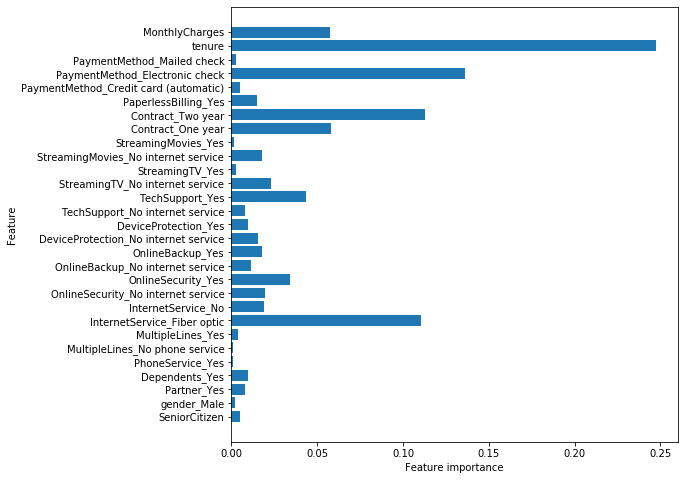

In [32]:
plot_feature_importances(forest)

### XgBoost

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [36]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 82.34%
Validation accuracy: 79.16%
